In [26]:
import os
os.chdir("../")
import pandas as pd
import seaborn
import sklearn
import geopandas as gpd
import missingno as msno
import seaborn as sns
from preprocessing.preprocessing import standardize_education_level, standardize_date
from datetime import datetime
import numpy as np

In [27]:
aggregated_file = "/Users/camillemodeste/aggregated_match_for_FSMS_files_with_yields_with_price.csv"
df_aggregated_file = pd.read_csv(aggregated_file, low_memory=False)
df_aggregated_file.drop(columns=["Unnamed: 0"], inplace=True)

In [28]:
columns = []
for col in df_aggregated_file.columns.to_list():
    new_col = col.replace("$","")
    columns.append(new_col)
df_aggregated_file.columns = columns

In [5]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df_aggregated_file.dtypes)

## Study data types in columns

Columns are not homogenous. Let's find out which columns will have to be modified.

In [29]:
df_aggregated_file = df_aggregated_file.astype({'numquest': 'float64','ident': 'float64','enqu': 'category',
                                                'hors nk': 'category','moughataa': 'category','commune': 'category',
                                                'villag': 'category','village': 'category','milieu': 'category',
                                                'wilaya': 'category','latitude': 'float64','longitude': 'float64',
                                                'Altitude': 'float64','numen': 'float64','date': 'category',
                                                'cdatsaisie': 'category','code enq': 'category',
                                                'code cont': 'category','LHG': 'category','LHZ': 'category',
                                                'fcs': 'float64','csi': 'float64','Tot_source': 'float64',
                                                'per.source1': 'float64','per.source2': 'float64',
                                                'per.source3': 'float64','per.source4': 'float64',
                                                'per.source5': 'float64','per.source6': 'float64',
                                                'per.source7': 'float64','per.source8': 'float64',
                                                'per.source9': 'float64','per.source10': 'float64',
                                                'Q9_1': 'category','Q9_2': 'category','Q9_3': 'category',
                                                'Q9_4': 'category','Q9_5': 'category','Q9_6': 'category',
                                                'Q9_7': 'category','Q9_8': 'category','Q9_9_162': 'category',
                                                'Q9_9_163': 'category','Q9_9_164': 'category',
                                                'Q9_9_165': 'category','Q9_9_166': 'category',
                                                'Q9_9_167': 'category','Q9_9_168': 'category',
                                                'Q9_9_169': 'category','Q9_9': 'category',
                                                'Nb_hom': 'float64','Nb_fem': 'float64',
                                                'Rap_feminité': 'float64','Pc_fem': 'float64',
                                                'Dependant': 'float64','TxDep': 'float64','Equiv_ad': 'float64',
                                                'Tailmen': 'category','Q2_5': 'float64','HWDDS': 'float64',
                                                'Pondérations': 'float64','Extrap': 'float64','Trage1': 'category',
                                                'Trage2': 'category','Q2_1': 'category','Q2_2': 'float64',
                                                'Q2_3': 'category','Q2_4': 'category','Scol': 'category',
                                                'Path': 'category','year': 'int64','month': 'category',
                                                'groundnut': 'int64','millet': 'int64','sorghum': 'int64',
                                                'maize': 'int64','cowpea': 'int64','cowpea': 'int64',
                                                'id':'category','Beans (niebe) - Retail':'float64',
                                                'Couscous - Retail':'float64','Feed (flour) - Retail':'float64',
                                                'Feed (rakhel) - Retail':'float64',
                                                'Feed (wheat bran) - Retail':'float64',
                                                'Livestock (camel) - Retail':'float64',
                                                'Livestock (cattle) - Retail':'float64',
                                                'Livestock (goat, medium-sized male) - Retail':'float64',
                                                'Livestock (sheep, medium-sized castrated male) - Retail':'float64',
                                                'Maize (local) - Retail':'float64','Meat (beef) - Retail':'float64',
                                                'Meat (camel) - Retail':'float64','Milk (powder) - Retail':'float64',
                                                'Millet - Retail':'float64','Oil (vegetable) - Retail':'float64',
                                                'Pasta (macaroni) - Retail':'float64',
                                                'Rice (imported) - Retail':'float64',
                                                'Rice (local) - Retail':'float64',
                                                "Sorghum (r'haya) - Retail":'float64',
                                                'Sorghum (red) - Retail':'float64',
                                                'Sorghum (taghalit) - Retail':'float64',
                                                'Straw - Retail':'float64','Sugar - Retail':'float64',
                                                'Wheat - Retail':'float64','Wheat flour - Retail':'float64',
                                                'Wheat meal - Retail':'float64'})

In [30]:
df_aggregated_file["Scol"]=standardize_education_level(df_aggregated_file["Scol"])

In [31]:
df_aggregated_file["date"] = df_aggregated_file["date"].apply(lambda row: standardize_date(row))

In [32]:
df_aggregated_file["date"] = pd.to_datetime(df_aggregated_file["date"], format="%Y-%m-%d", errors='coerce')

In [7]:
for col in df_aggregated_file.columns.to_list(): 
    check = df_aggregated_file[col].unique()
    if len(check)<100:
        print("---- "+col)
        with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
            print(pd.Series(check))
        print("---------------------------------------------------------------------")
    else:
        print("---- "+col)
        print(pd.Series(check))
        print("---------------------------------------------------------------------")

---- numquest
0         12305.0
1         12407.0
2         10606.0
3         12308.0
4         12706.0
           ...   
16451    813805.0
16452    813804.0
16453    813803.0
16454    813802.0
16455    813801.0
Length: 16456, dtype: float64
---------------------------------------------------------------------
---- ident
0        12305.0
1        12407.0
2        10606.0
3        12308.0
4        12706.0
          ...   
12584    13195.0
12585    13185.0
12586    13292.0
12587    13179.0
12588    13183.0
Length: 12589, dtype: float64
---------------------------------------------------------------------
---- enqu
0                   Sid'ahmed Ould Brami
1                    Moctar Ould Mohamed
2            Mohamed Lemine Ould Mahfoud
3                     Fatimata Sileye BA
4                         Di Ould Khtour
5                     Mohamed Ould Tolbe
6                      Taleb Ould Ahmena
7                         Fatimata Niass
8                       Brahim Ould Beye
9          

## Missing values


Let's get a first impression of the missing values in our dataset :

<AxesSubplot:>

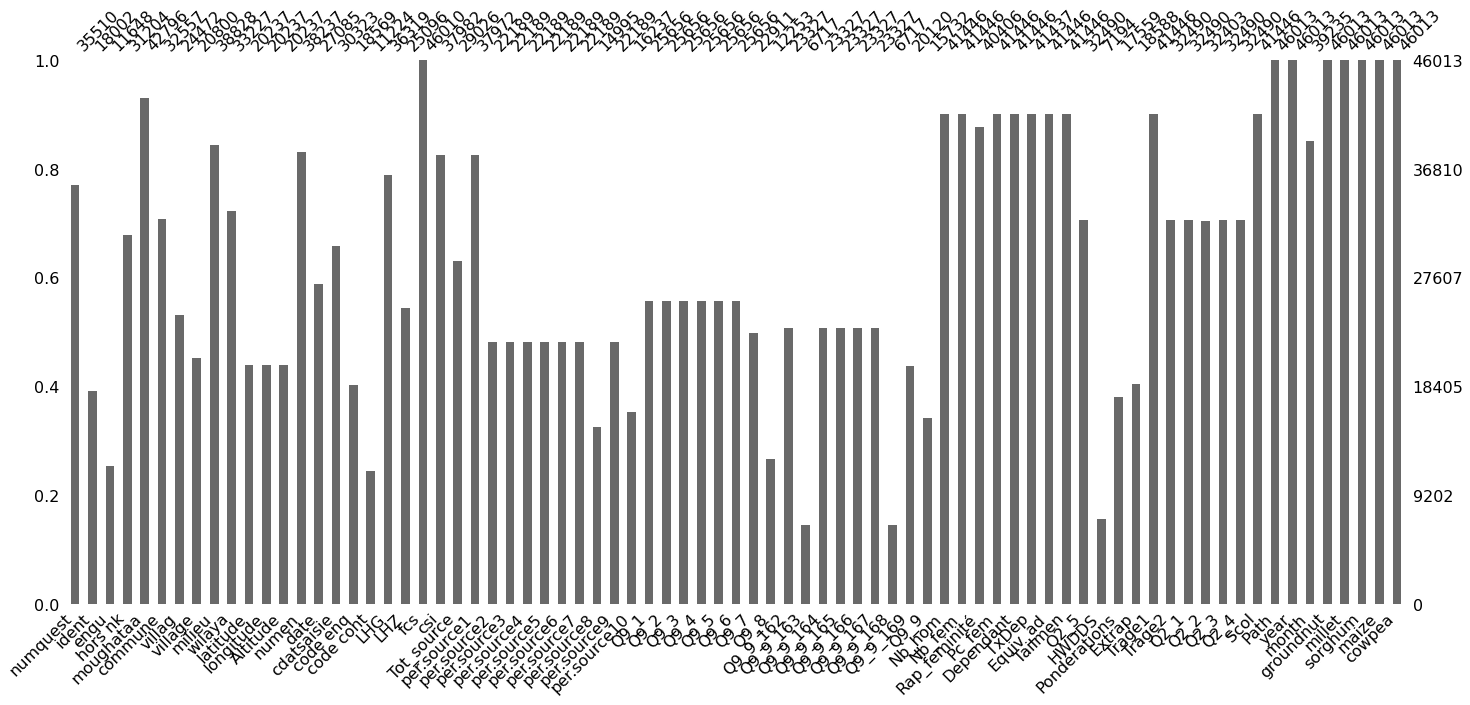

In [8]:
msno.bar(df_aggregated_file, labels=True)

It shows bars that are proportional to the number of non-missing values as well as providing the actual number of non-missing values. We get an idea of how much of each column is missing.

Next step is to choose how to replace each missing value.

## Data distribution

### 1. Numeric distributions

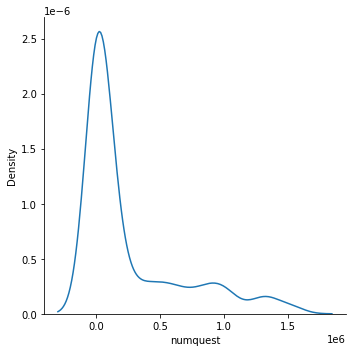

In [9]:
sns.displot(df_aggregated_file, x="numquest", kind="kde", bw_adjust=2)

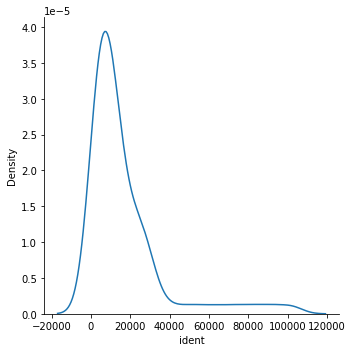

In [10]:
sns.displot(df_aggregated_file, x="ident", kind="kde", bw_adjust=2)

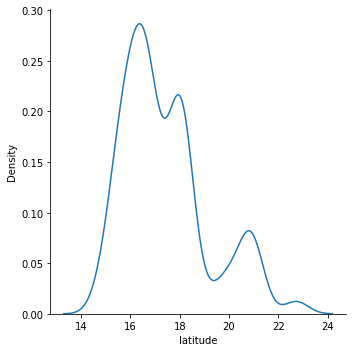

In [11]:
sns.displot(df_aggregated_file, x="latitude", kind="kde", bw_adjust=2)

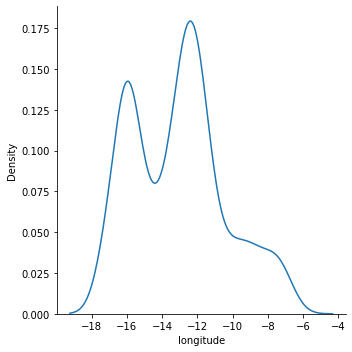

In [12]:
sns.displot(df_aggregated_file, x="longitude", kind="kde", bw_adjust=2)

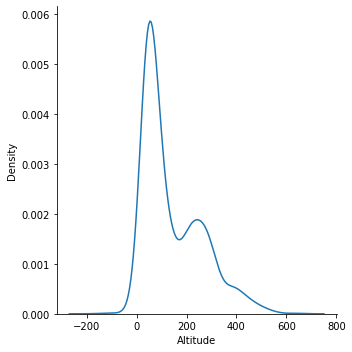

In [13]:
sns.displot(df_aggregated_file, x="Altitude", kind="kde", bw_adjust=2)

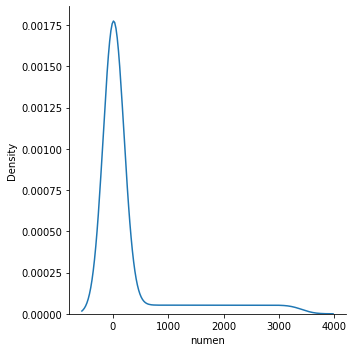

In [14]:
sns.displot(df_aggregated_file, x="numen", kind="kde", bw_adjust=2)

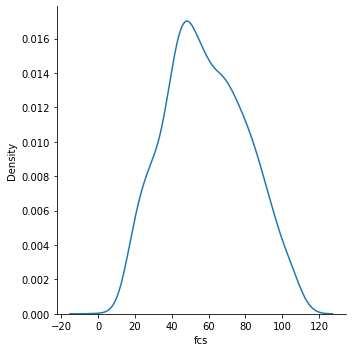

In [15]:
sns.displot(df_aggregated_file, x="fcs", kind="kde", bw_adjust=2)

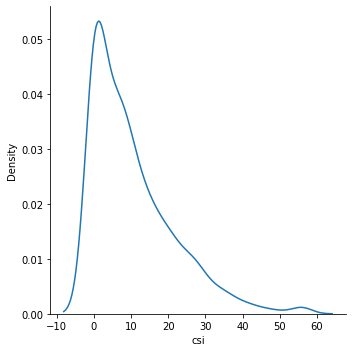

In [16]:
sns.displot(df_aggregated_file, x="csi", kind="kde", bw_adjust=2)

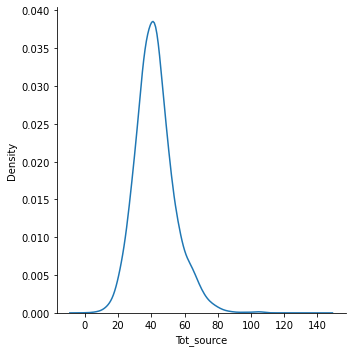

In [17]:
sns.displot(df_aggregated_file, x="Tot_source", kind="kde", bw_adjust=2)

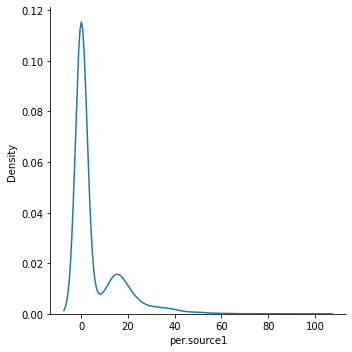

In [18]:
sns.displot(df_aggregated_file, x="per.source1", kind="kde", bw_adjust=2)

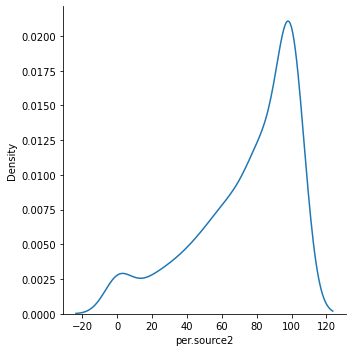

In [19]:
sns.displot(df_aggregated_file, x="per.source2", kind="kde", bw_adjust=2)

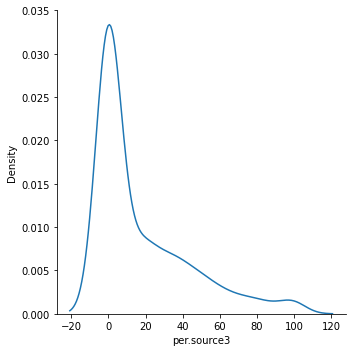

In [20]:
sns.displot(df_aggregated_file, x="per.source3", kind="kde", bw_adjust=2)

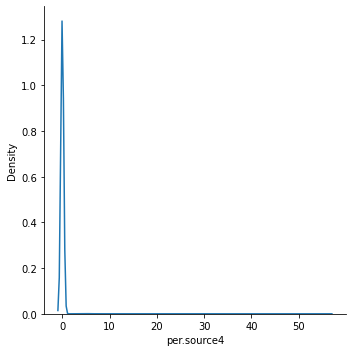

In [21]:
sns.displot(df_aggregated_file, x="per.source4", kind="kde", bw_adjust=2)

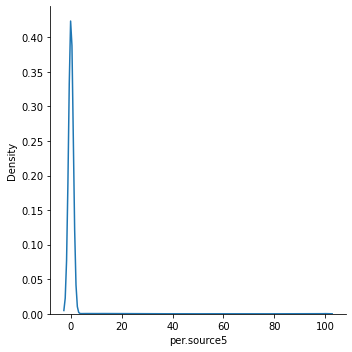

In [22]:
sns.displot(df_aggregated_file, x="per.source5", kind="kde", bw_adjust=2)

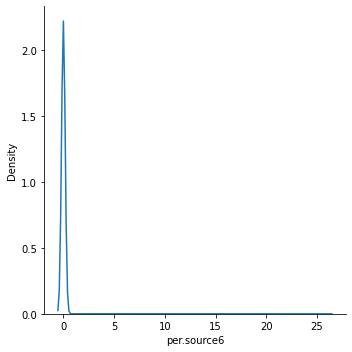

In [23]:
sns.displot(df_aggregated_file, x="per.source6", kind="kde", bw_adjust=2)

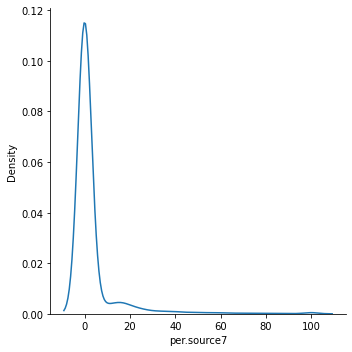

In [24]:
sns.displot(df_aggregated_file, x="per.source7", kind="kde", bw_adjust=2)

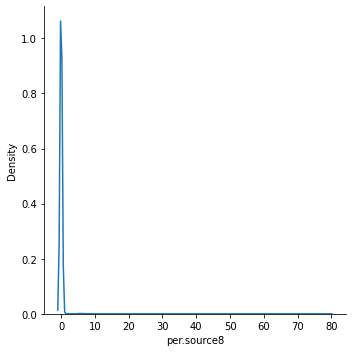

In [25]:
sns.displot(df_aggregated_file, x="per.source8", kind="kde", bw_adjust=2)

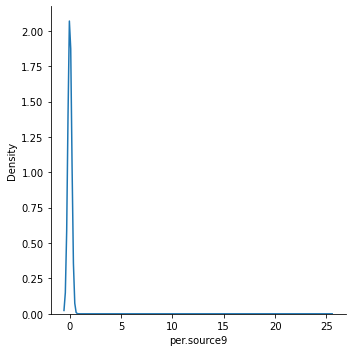

In [26]:
sns.displot(df_aggregated_file, x="per.source9", kind="kde", bw_adjust=2)

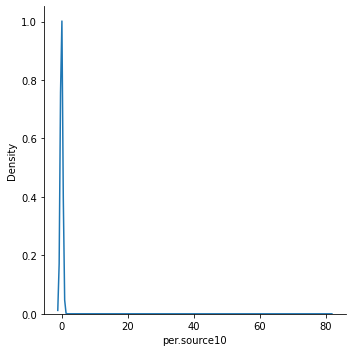

In [27]:
sns.displot(df_aggregated_file, x="per.source10", kind="kde", bw_adjust=2)

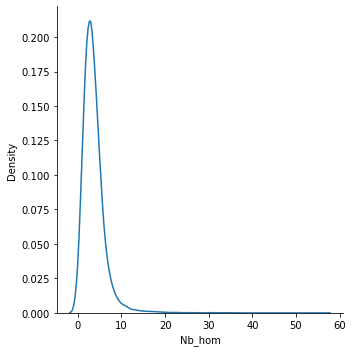

In [28]:
sns.displot(df_aggregated_file, x='Nb_hom', kind="kde", bw_adjust=2)

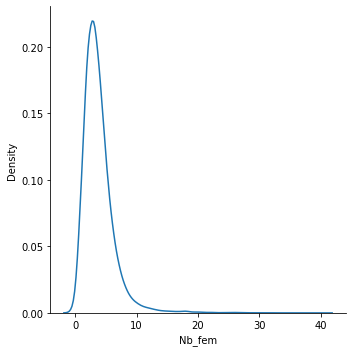

In [29]:
sns.displot(df_aggregated_file, x='Nb_fem', kind="kde", bw_adjust=2)

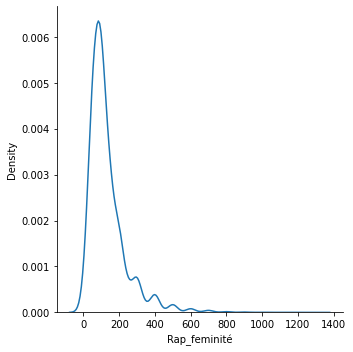

In [30]:
sns.displot(df_aggregated_file, x='Rap_feminité', kind="kde", bw_adjust=2)

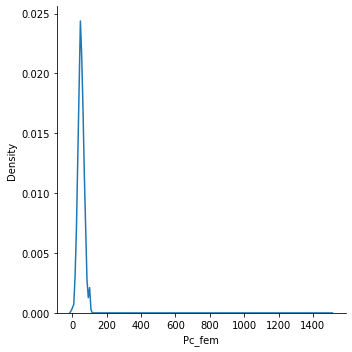

In [31]:
sns.displot(df_aggregated_file, x='Pc_fem', kind="kde", bw_adjust=2)

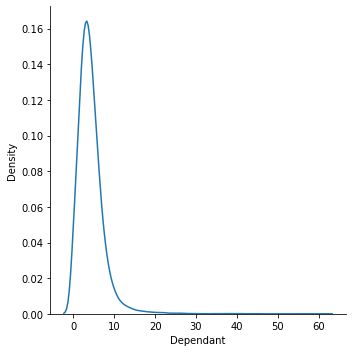

In [32]:
sns.displot(df_aggregated_file, x='Dependant', kind="kde", bw_adjust=2)

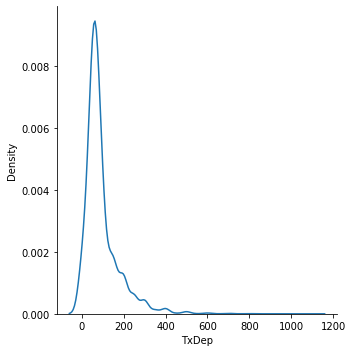

In [33]:
sns.displot(df_aggregated_file, x='TxDep', kind="kde", bw_adjust=2)

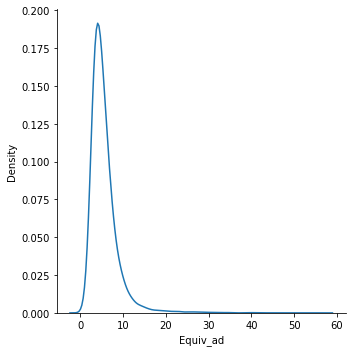

In [34]:
sns.displot(df_aggregated_file, x='Equiv_ad', kind="kde", bw_adjust=2)

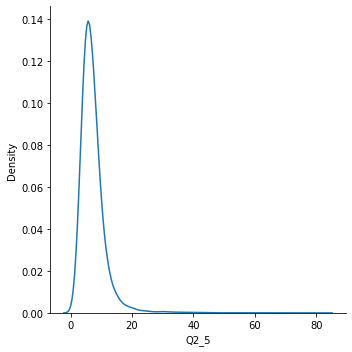

In [35]:
sns.displot(df_aggregated_file, x='Q2_5', kind="kde", bw_adjust=2)

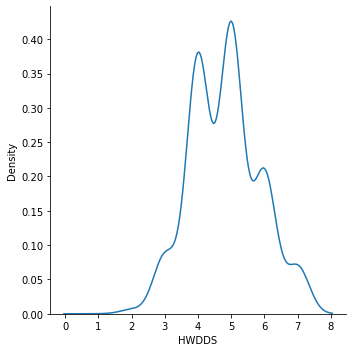

In [36]:
sns.displot(df_aggregated_file, x='HWDDS', kind="kde", bw_adjust=2)

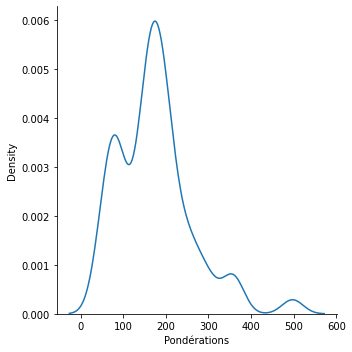

In [37]:
sns.displot(df_aggregated_file, x='Pondérations', kind="kde", bw_adjust=2)

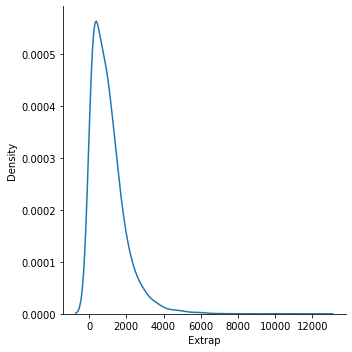

In [38]:
sns.displot(df_aggregated_file, x='Extrap', kind="kde", bw_adjust=2)

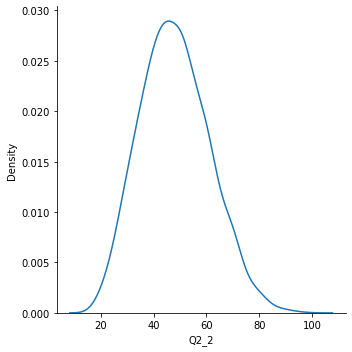

In [39]:
sns.displot(df_aggregated_file, x='Q2_2', kind="kde", bw_adjust=2)

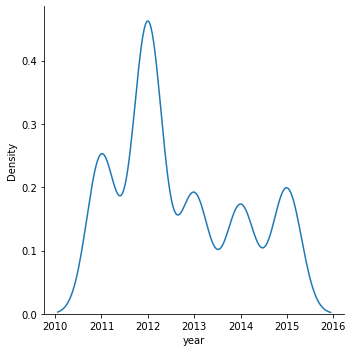

In [40]:
sns.displot(df_aggregated_file, x='year', kind="kde", bw_adjust=2)

Ces valeurs sont constantes, on ne peut pas en tracer la distribution.

In [41]:
#sns.displot(df_aggregated_file, x='groundnut', kind="kde", bw_adjust=2)
#sns.displot(df_aggregated_file, x='millet', kind="kde", bw_adjust=2)
#sns.displot(df_aggregated_file, x='sorghum', kind="kde", bw_adjust=2)
#sns.displot(df_aggregated_file, x='maize', kind="kde", bw_adjust=2)
#sns.displot(df_aggregated_file, x='cowpea', kind="kde", bw_adjust=2)

### 2. Categories

<AxesSubplot:xlabel='enqu'>

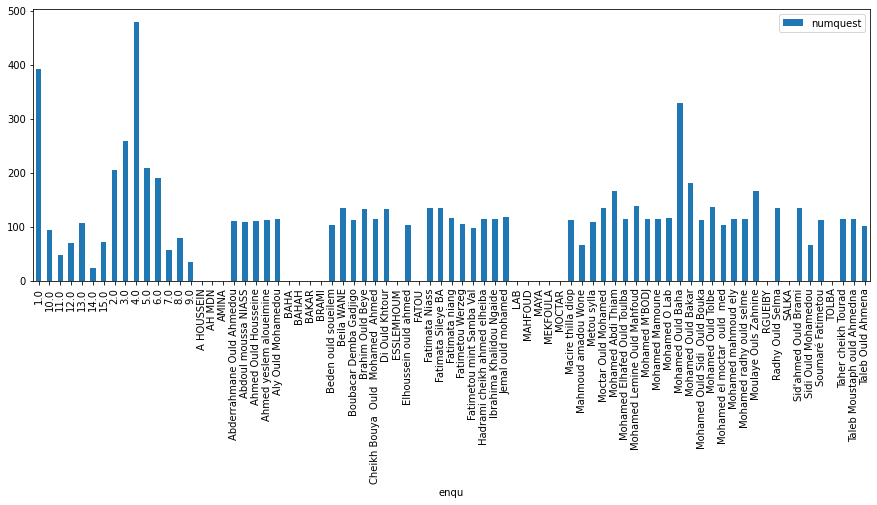

In [42]:
pd.DataFrame(df_aggregated_file.groupby("enqu").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='hors nk'>

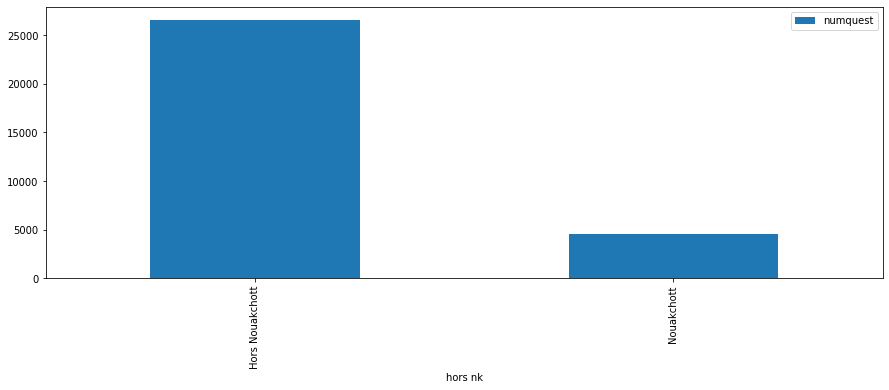

In [43]:
pd.DataFrame(df_aggregated_file.groupby("hors nk").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='moughataa'>

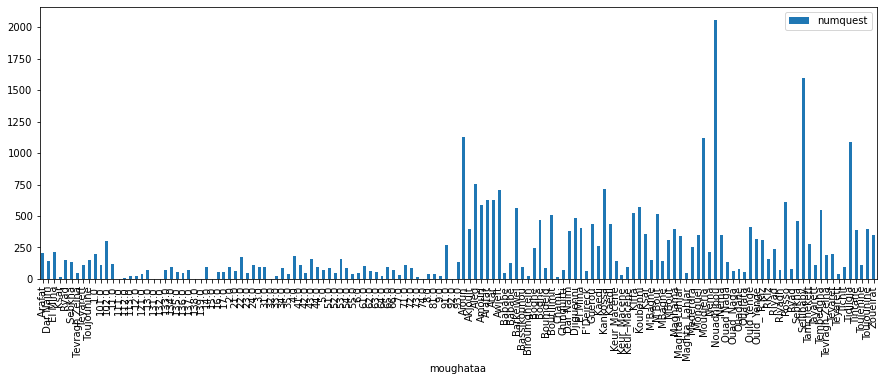

In [44]:
pd.DataFrame(df_aggregated_file.groupby("moughataa").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='commune'>

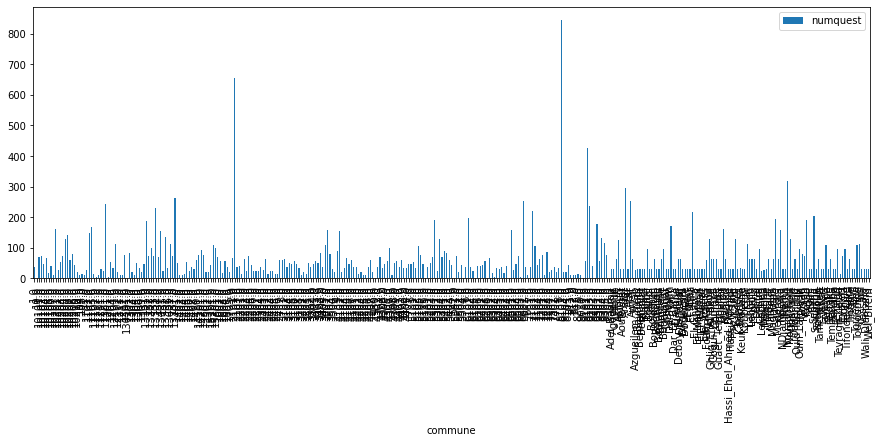

In [45]:
pd.DataFrame(df_aggregated_file.groupby("commune").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='villag'>

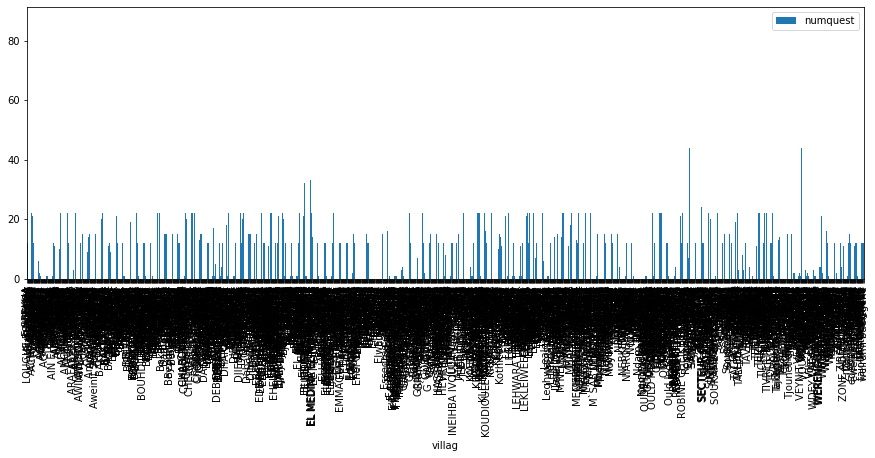

In [46]:
pd.DataFrame(df_aggregated_file.groupby("villag").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='village'>

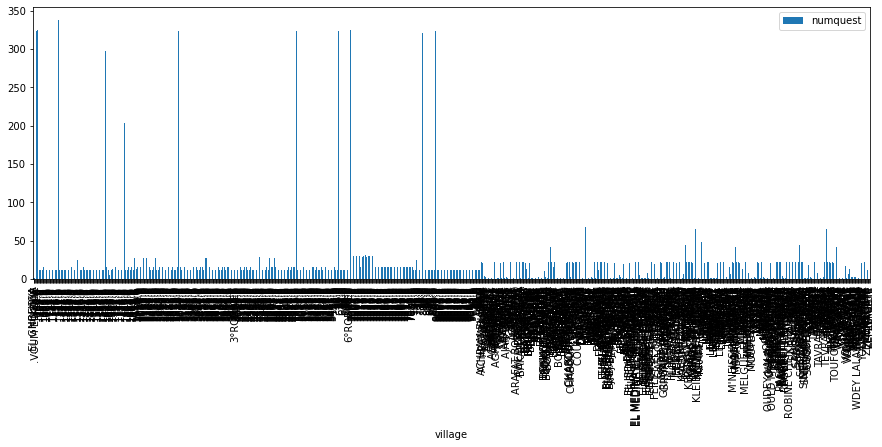

In [47]:
pd.DataFrame(df_aggregated_file.groupby("village").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='milieu'>

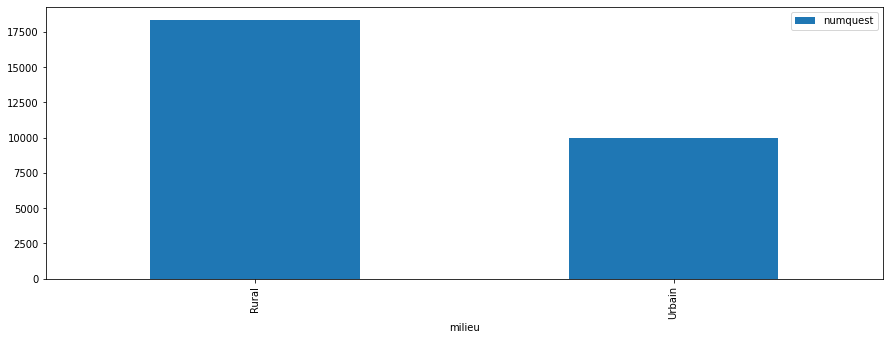

In [48]:
pd.DataFrame(df_aggregated_file.groupby("milieu").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='wilaya'>

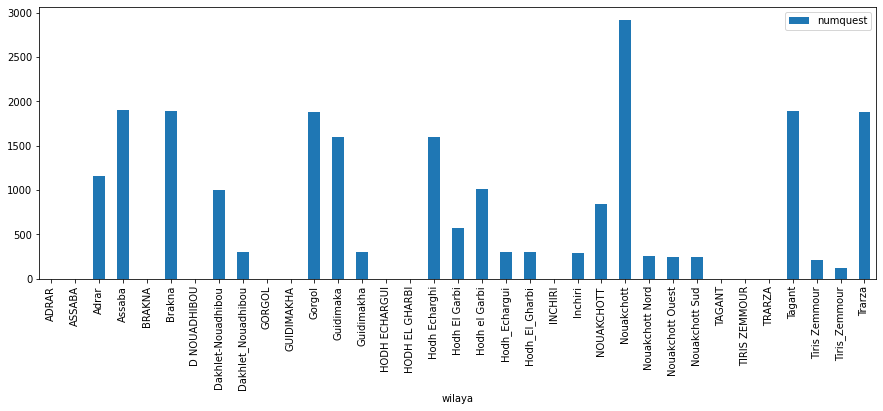

In [49]:
pd.DataFrame(df_aggregated_file.groupby("wilaya").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='date'>

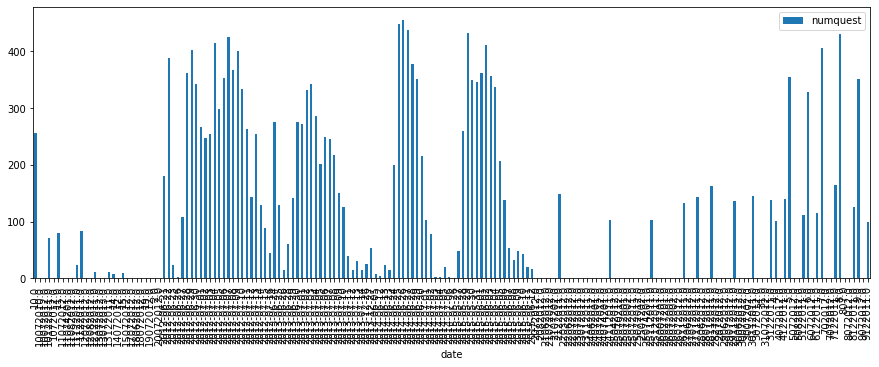

In [50]:
pd.DataFrame(df_aggregated_file.groupby("date").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='cdatsaisie'>

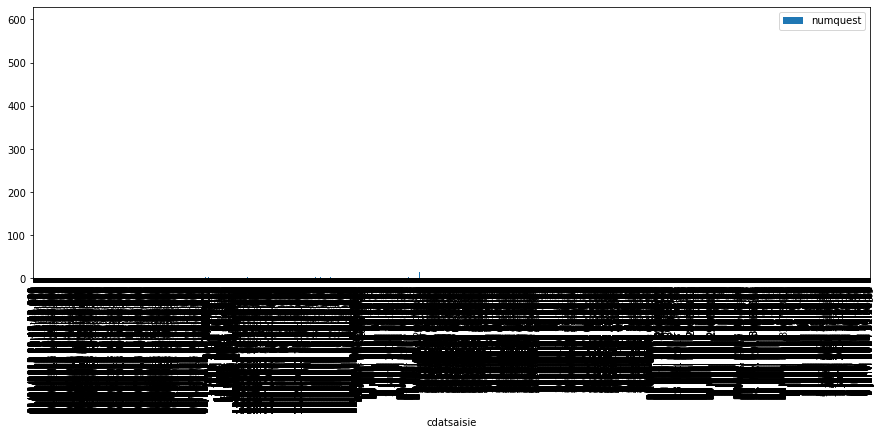

In [51]:
pd.DataFrame(df_aggregated_file.groupby("cdatsaisie").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='code enq'>

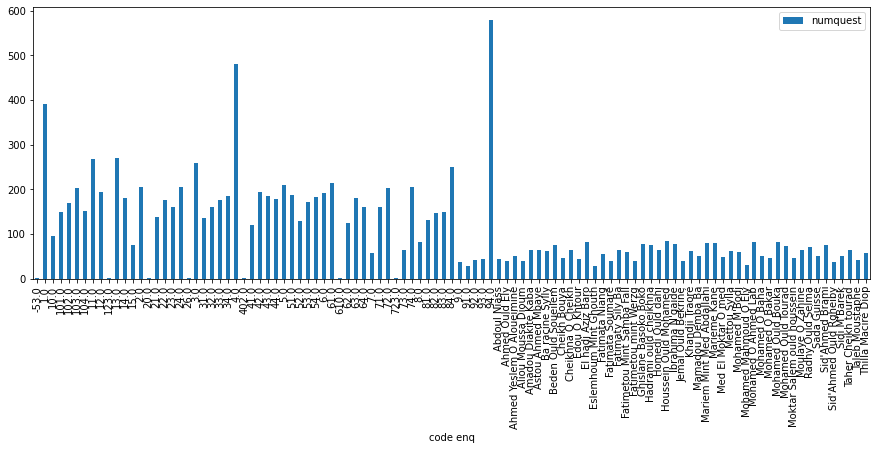

In [52]:
pd.DataFrame(df_aggregated_file.groupby("code enq").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='code cont'>

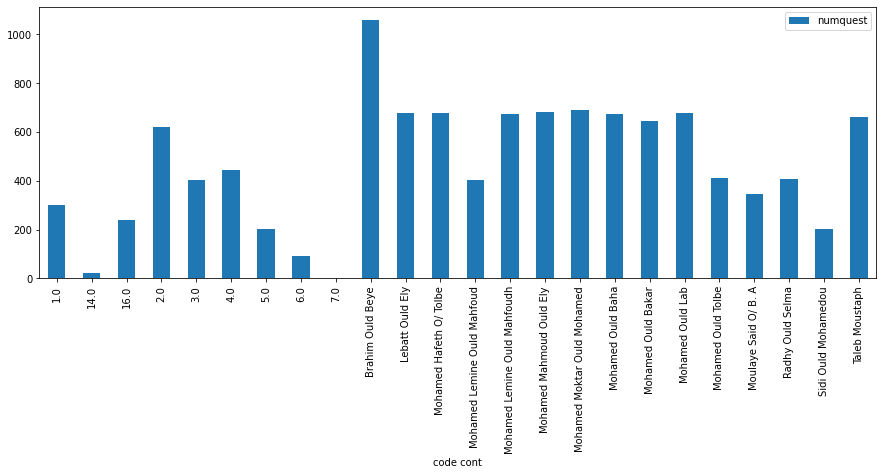

In [53]:
pd.DataFrame(df_aggregated_file.groupby("code cont").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='LHG'>

/Users/camillemodeste/PycharmProjects/current_code/pyro-risks/venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/camillemodeste/PycharmProjects/current_code/pyro-risks/venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


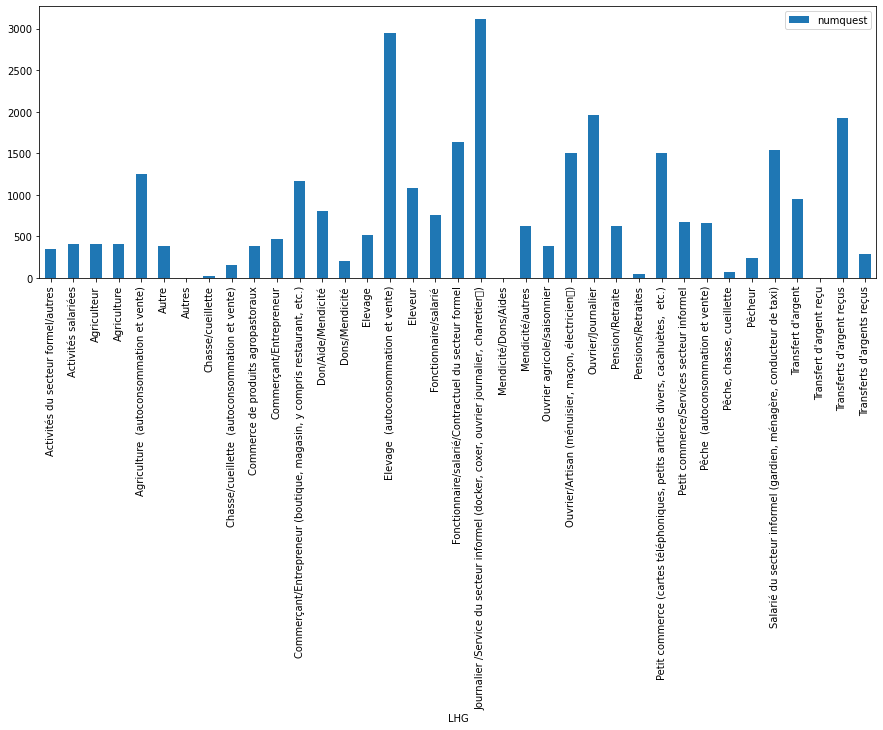

In [54]:
pd.DataFrame(df_aggregated_file.groupby("LHG").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='LHZ'>

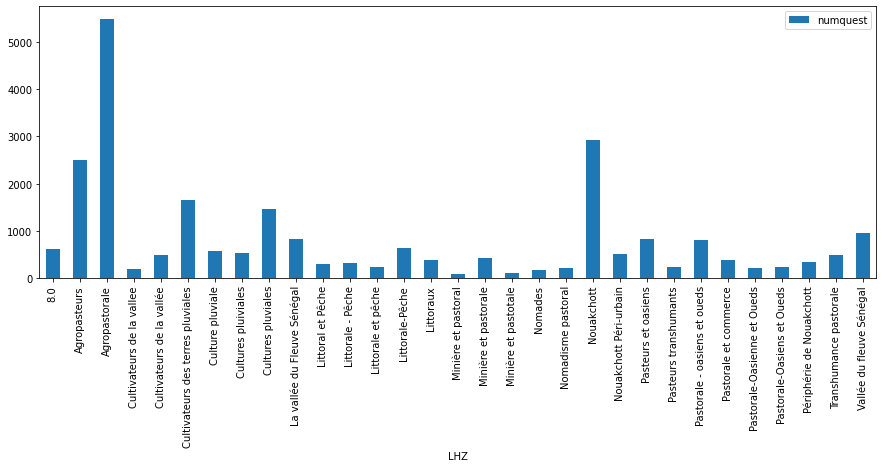

In [55]:
pd.DataFrame(df_aggregated_file.groupby("LHZ").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='Q9_1'>

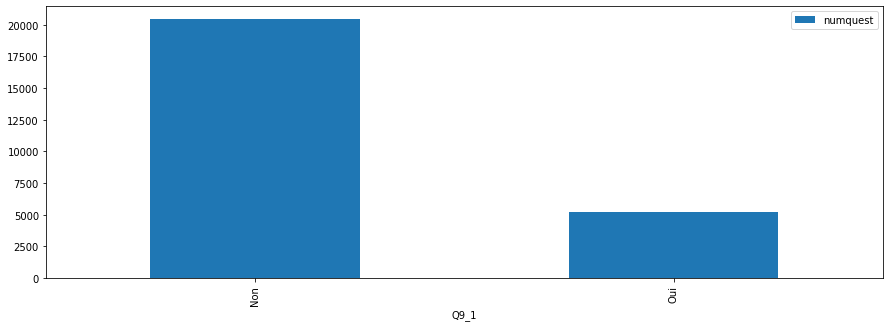

In [56]:
pd.DataFrame(df_aggregated_file.groupby("Q9_1").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='Q9_2'>

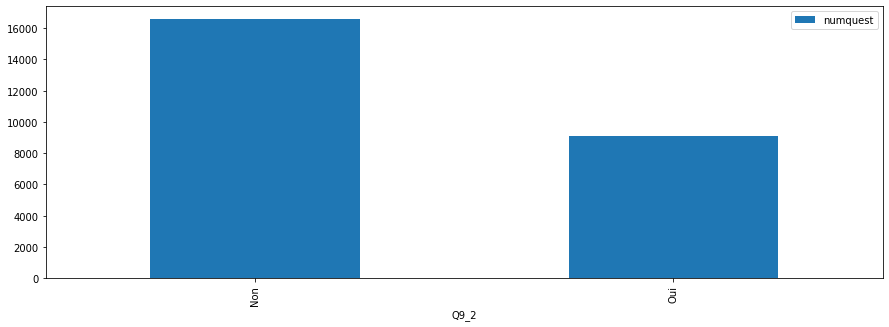

In [57]:
pd.DataFrame(df_aggregated_file.groupby("Q9_2").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='Q9_3'>

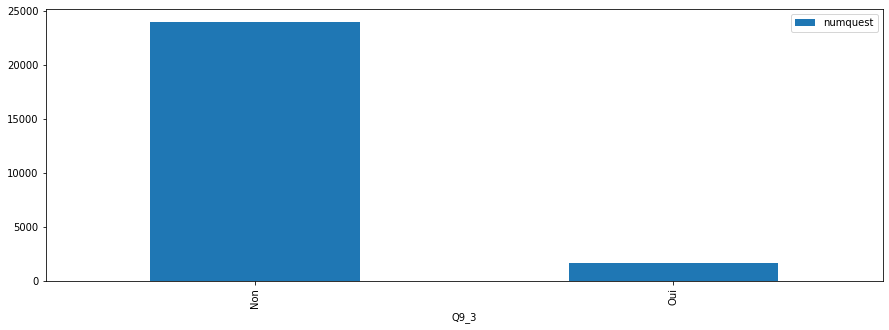

In [58]:
pd.DataFrame(df_aggregated_file.groupby("Q9_3").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='Q9_4'>

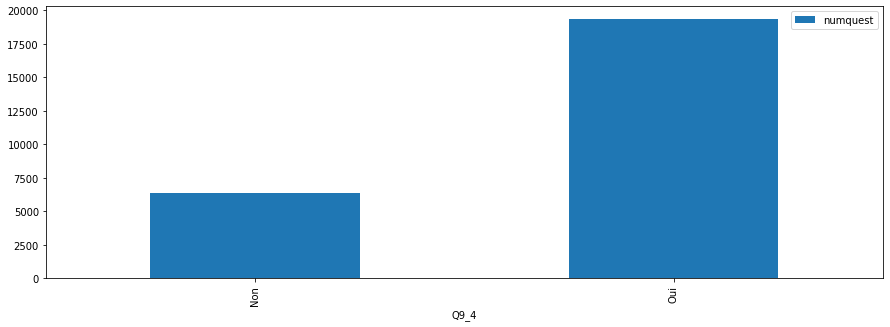

In [59]:
pd.DataFrame(df_aggregated_file.groupby("Q9_4").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='Q9_5'>

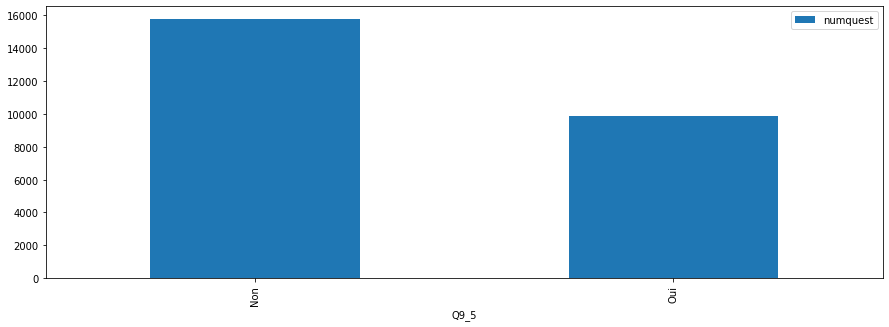

In [60]:
pd.DataFrame(df_aggregated_file.groupby("Q9_5").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='Q9_6'>

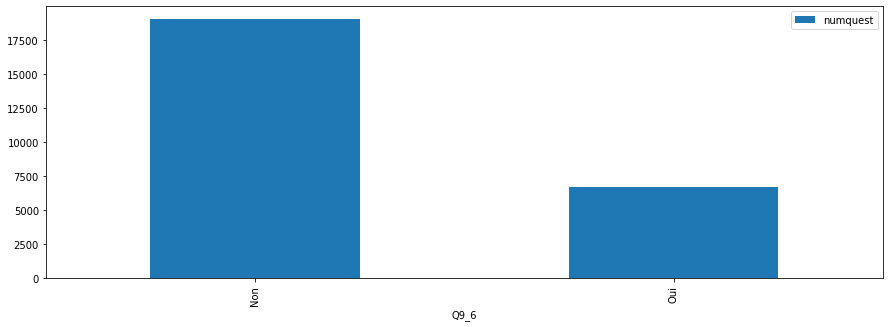

In [61]:
pd.DataFrame(df_aggregated_file.groupby("Q9_6").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='Q9_7'>

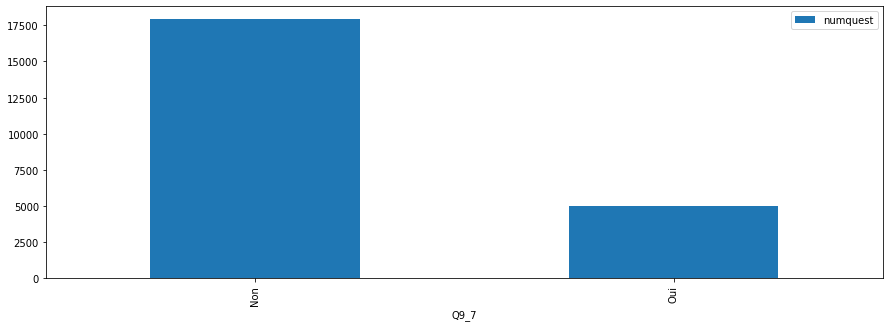

In [62]:
pd.DataFrame(df_aggregated_file.groupby("Q9_7").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='Q9_8'>

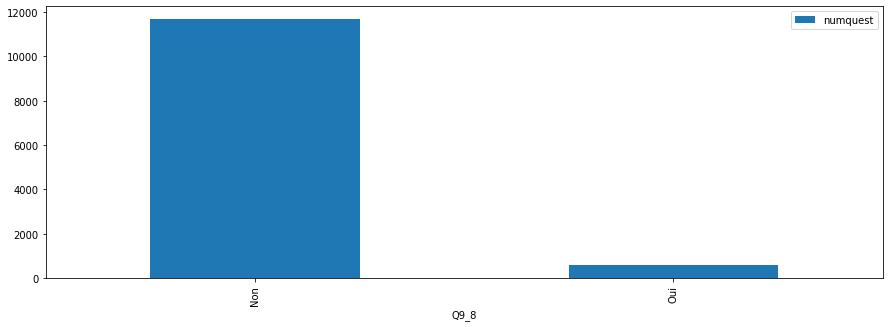

In [63]:
pd.DataFrame(df_aggregated_file.groupby("Q9_8").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

<AxesSubplot:xlabel='Q9_9'>

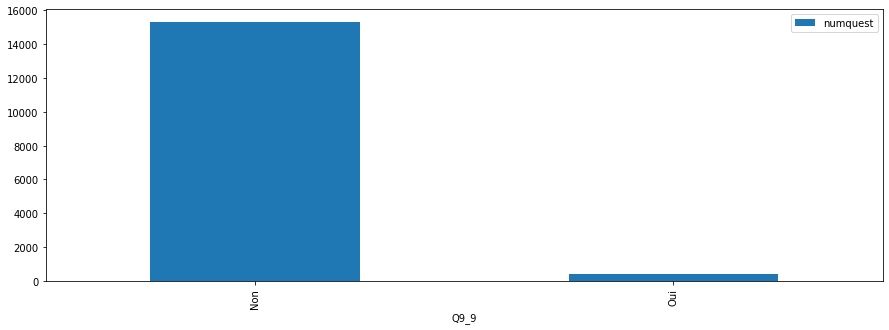

In [64]:
pd.DataFrame(df_aggregated_file.groupby("Q9_9").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [65]:
pd.DataFrame(df_aggregated_file.groupby("Q9_162").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

KeyError: 'Q9_162'

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Q9_163").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Q9_164").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Q9_16$5").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Q9_16$6").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Q9_16$7").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Q9_16$8").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Q9_16$9").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Q9_9").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Tailmen").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Trage1").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Trage2").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Q2_1").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Q2_3").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Q2_4").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Scol").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("Path").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

In [ ]:
pd.DataFrame(df_aggregated_file.groupby("month").count()[["numquest"]]).plot(kind='bar', figsize=(15, 5))

### Tailmen cleaning

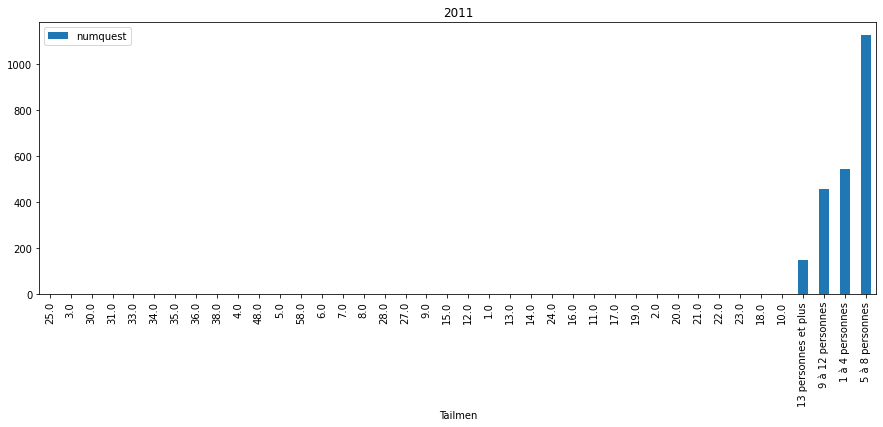

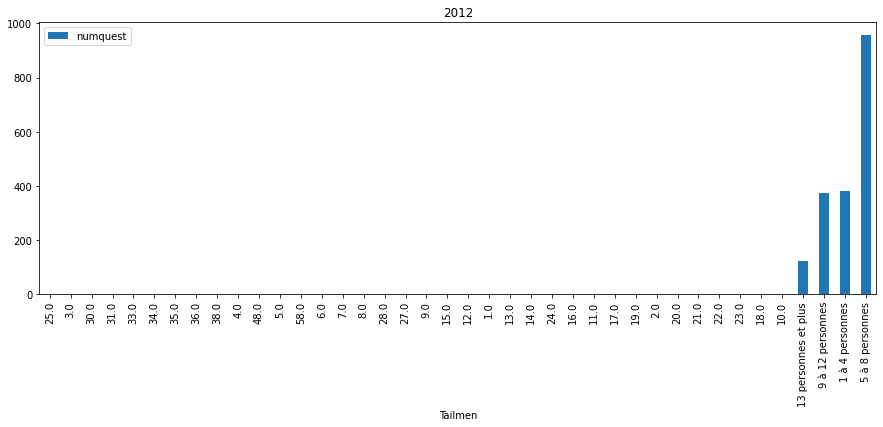

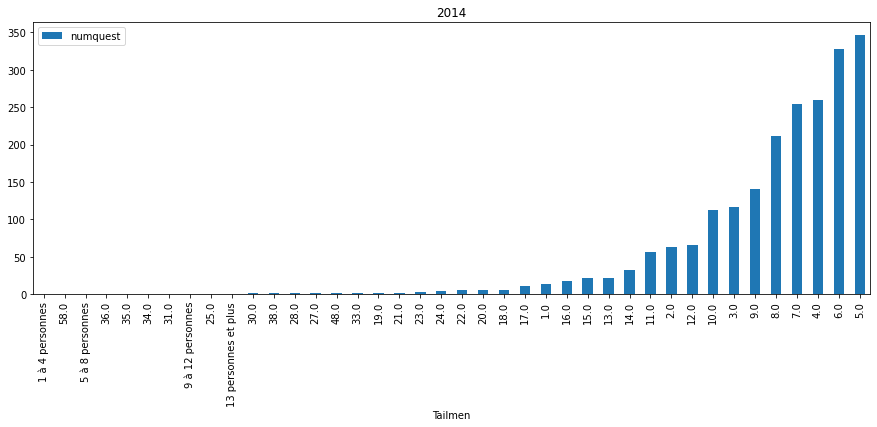

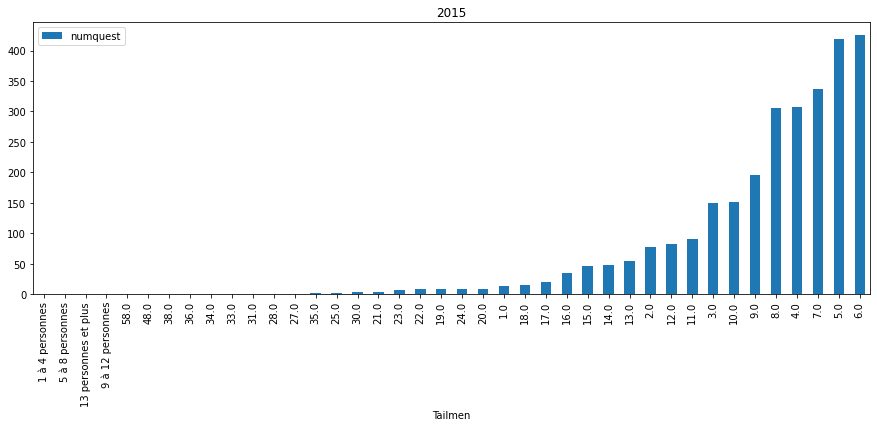

In [24]:
for year in df_aggregated_file["year"].unique():
    tmp_df = df_aggregated_file.loc[df_aggregated_file["year"]==year]
    tmp_df = pd.DataFrame(tmp_df.groupby("Tailmen").count()[["numquest"]]).sort_values(by=["numquest"])
    tmp_df.plot(kind='bar', figsize=(15, 5), title=year)

In [39]:
def standardize_tailmen(tailmen):
    if len(tailmen)<5:
        count_tailmen = float(tailmen)
        if count_tailmen < 5:
            return "1 à 4 personnes"
        elif count_tailmen < 9 and count_tailmen >= 5:
            return "5 à 8 personnes"
        elif count_tailmen < 13 and count_tailmen >= 9:
            return "9 à 12 personnes"
        else:
            return "13 personnes et plus"
    else:
        return tailmen

In [40]:
df_aggregated_file["Tailmen"] = df_aggregated_file["Tailmen"].apply(lambda row: standardize_tailmen(row))
df_aggregated_file["Tailmen"]

0            1 à 4 personnes
1           9 à 12 personnes
2            5 à 8 personnes
3            1 à 4 personnes
4           9 à 12 personnes
                ...         
9040         1 à 4 personnes
9041         5 à 8 personnes
9042    13 personnes et plus
9043         5 à 8 personnes
9044         5 à 8 personnes
Name: Tailmen, Length: 9045, dtype: object